### Importando Bibliotecas

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

 - https://pandas-datareader.readthedocs.io/en/latest/
 
 - https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
 
 - https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo

In [2]:
import pandas_datareader
import pandas_datareader.data as web
import datetime

- https://github.com/matplotlib/mplfinance

In [4]:
import mplfinance as mpf

---

### Utilizando a biblioteca MPLFINANCE

In [32]:
bitcoin = web.get_data_yahoo('BTC-USD', 
                          start = datetime.datetime(2021, 1, 1), 
                          end = datetime.datetime(2022, 4, 1))

In [33]:
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688
...,...,...,...,...,...,...
2022-03-29,48022.289062,47100.437500,47100.437500,47465.730469,31397059069,47465.730469
2022-03-30,47655.148438,46746.210938,47456.898438,47062.664062,29333883962,47062.664062
2022-03-31,47512.027344,45390.539062,47062.148438,45538.675781,33327427106,45538.675781


Text(0.5, 1.0, 'Linha')

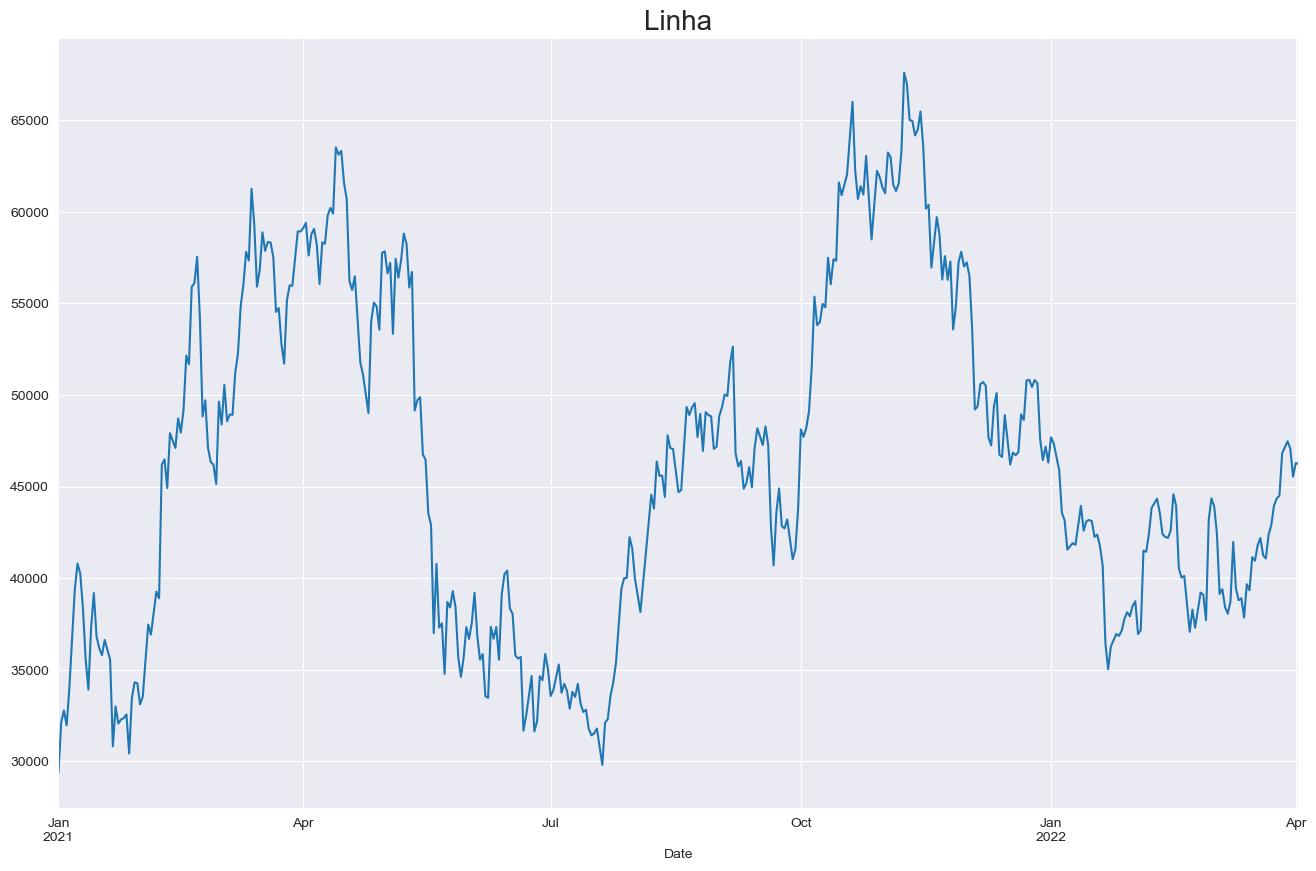

In [63]:
bitcoin['Close'].plot(figsize = (16, 10))
plt.title('Linha', fontsize = 20)

In [35]:
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


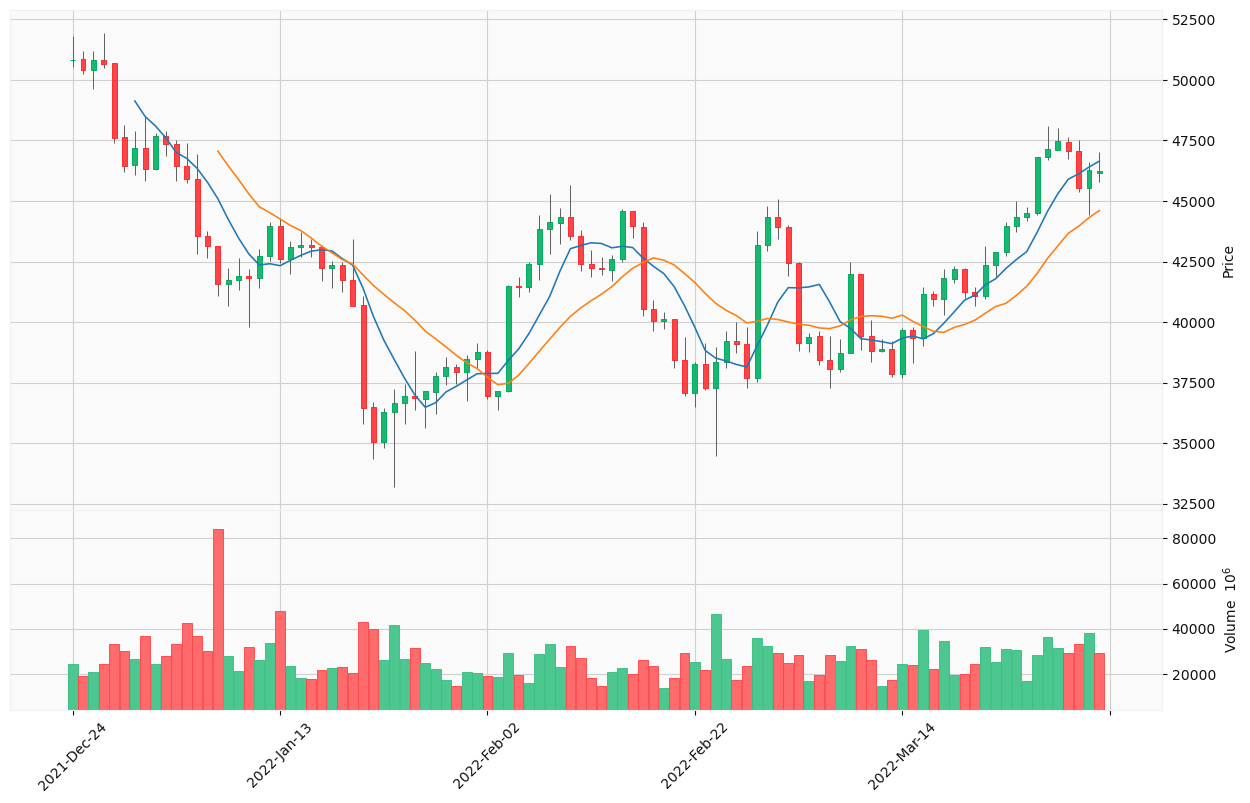

In [61]:
mpf.plot(bitcoin.tail(100), type = 'candle', figsize = (16, 10), volume = True, mav = (7, 15), style = 'yahoo')

---

### Gráfico de Candles (Manual)

In [68]:
btc = bitcoin.loc['2022-1': '2022-4']
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-01,47827.312500,46288.484375,46311.746094,47686.812500,24582667004,47686.812500
2022-01-02,47881.406250,46856.937500,47680.925781,47345.218750,27951569547,47345.218750
2022-01-03,47510.726562,45835.964844,47343.542969,46458.117188,33071628362,46458.117188
2022-01-04,47406.546875,45752.464844,46458.851562,45897.574219,42494677905,45897.574219
2022-01-05,46929.046875,42798.222656,45899.359375,43569.003906,36851084859,43569.003906


#### Baseado em: https://www.statology.org/matplotlib-python-candlestick-chart/

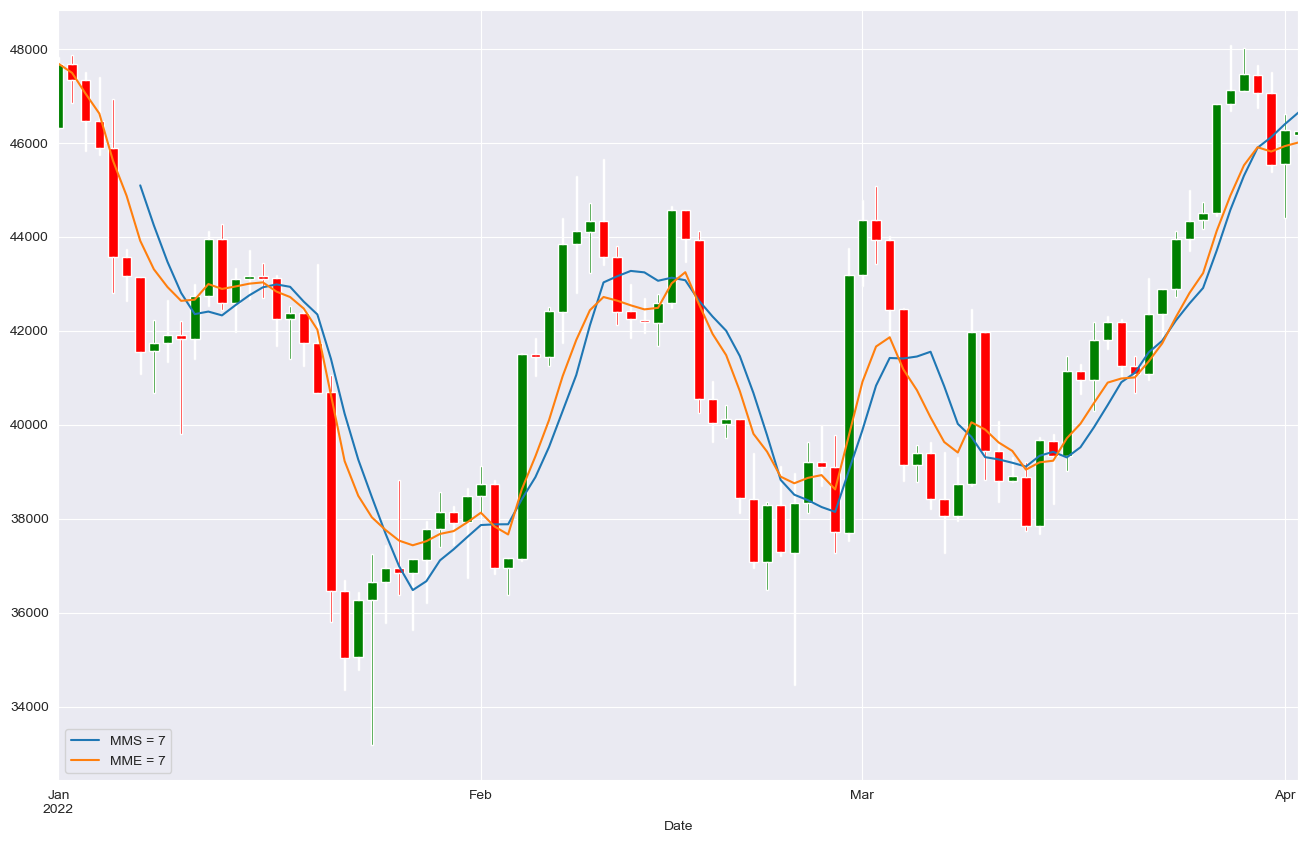

In [86]:
# Criando uma figura
plt.figure(figsize = (16, 10))

# Definir espessura do candle e da sombra
esp_candle = .7
esp_sombra = .1

# Definir candles de alta e de baixa
alta = btc[btc['Close'] >= btc['Open']]
baixa = btc[btc['Close'] < btc['Open']]

# Escolher cores
cor_alta = 'green'
cor_baixa = 'red'

# Plotar candles de alta
plt.bar(alta.index, alta['Close'] - alta['Open'], esp_candle, bottom = alta['Open'], color = cor_alta)
plt.bar(alta.index, alta['High'] - alta['Close'], esp_sombra, bottom = alta['Close'], color = cor_alta)
plt.bar(alta.index, alta['Low'] - alta['Open'], esp_sombra, bottom = alta['Open'], color = cor_alta)

# Plotar candles de baixa
plt.bar(baixa.index, baixa['Close'] - baixa['Open'], esp_candle, bottom = baixa['Open'], color = cor_baixa)
plt.bar(baixa.index, baixa['High'] - baixa['Open'], esp_sombra, bottom = baixa['Open'], color = cor_baixa)
plt.bar(baixa.index, baixa['Low'] - baixa['Close'], esp_sombra, bottom = baixa['Close'], color = cor_baixa)

# Adicionando Médias Móveis
btc['Close'].rolling(window = 7).mean().plot(label = 'MMS = 7')
btc['Close'].ewm(span = 7).mean().plot(label = 'MME = 7')

plt.legend()
plt.show()